
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

medical_df = pd.read_csv('medical-charges.csv')

In [144]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Після первинної підготовки даних (визначити типи даних, перевірка на null значення, очищення даних і т.д.) візуалізувати розподіли колонок, а також порівняти їх враховуючи Target змінну (в нашому випадку це charges). Зробити висновки, які з цих колонок потенційно впливають на charges.
2. Проаналізувати базову статистику (describe) в цих розподілах та їх впливу на Target змінну. Також можна провести сегментацію клієнтів (наприклад, основні вікові групи, палить - не палить та ін.) та порівняти статистику charges у кожному сегменті.
3. Обчислити кореляцію між даними, їхніми комбінаціями та визначити сильні звʼязки, щоб зрозуміти, над чим потрібно працювати першочергово.
4. Також можна провести статистичні тести (z-тести, t-тести), наприклад, перевірити зміну середніх значень charges при різних категоріях (палить - не палить, стать, група віку і т. д.)

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [145]:
# Візуалізація розподілу медичних зборів з розбиттям за категоріями ознаки Sex
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

1. Бачимо, що медіана для чоловіків та жінок практично однакова (≈ 9k-9.5k)
2. Міжквартильні діапазони теж досить схожі, крім q3, для чоловіків він є трохи вищим (жінки q3 ≈ 14.5k, чоловіки q3 ≈ 19k)
3. Теж саме можемо сказати і про верхню межу для викидів - у чоловіків вона вища (можливо, через більшу наявність високих значень).
4. Спостерігається, що для малих виплат (0-2k) маємо більше значень саме для чоловіків, також бачимо більшу частку чоловіків для більших значень (від 30k).
5. Можемо зробити висновок, що чоловіки частіше мають випадки з високими медичними витратами. Але загалом, різниця між статтю не є критично великою.

In [147]:
# Візуалізація розподілу медичних зборів з розбиттям за категоріями ознаки Region
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'green', 'orange', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

1. Бачимо, що медіанні значення практично не відрізняються для категорії region (≈ 9k-10k)
2. Спостерігається невелика різниця верхніх значень, а саме для категорій southeast та northeast вони є вищими, порівняно з southwest та northwest
3. Можемо зробити припущення, що в південно чи північно східних регіонах частіше зустрічаються високі виплати.
4. Роблячи загальні висновки - невелика залежність від регіону спостерігається, але не можемо сказати, що вона критична.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [148]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

1. Бачимо, що різниці по некурцям відносно регіонів практично не спостерігається. 
2. Щодо курців - невелика перевага значень бачимо для категорії southeast, можемо припустити, що це може впливати на попередній результат, де ми спостерігали більше високих виплат саме для категорії southeast.

In [149]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker', category_orders={'children': [0, 1, 2, 3, 4, 5]})

1. Серед курців бачимо, що найбільшу частку займає категорія 0 дітей. Всього одне значення 5 дітей та немає значень 4 дітей, що можна вважати логічним для популяції.
2. Для некурців теж спостерігаємо найбільшу частку для категорії 0 дітей, та поступове зниження к-сті значень зі збільшенням дітей, та також невеликою кількістю значень для 4 та 5 дітей.
3. Можна зробити висновок, що кількість дітей не дуже повʼязана зі значеннями курець - не курець.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [150]:
fig = px.violin (
    medical_df,
    x='children',
    y='charges',
    box=True,
    category_orders={'children': [0, 1, 2, 3, 4, 5]},
    title='Charges and Number of Children'
)
fig.show()

1. Для категорії 0 дітей спостерігається кілька локальних піків щільності, зокрема в діапазонах приблизно 2.5k та 12k, при цьому більшість значень зосереджена до 20k.
2. Для людей з 1 дитиною найбільше значень бачимо приблизно до 16k, а найбільший пік значень спостерігаємо на рівні ~ 6k.
3. Для 2 та 3 дітей спостерігаємо, що тут більшість значень зосередженно до 20k, а найбільша щільність даних навколо значень ~ 7k-8k.
4. Для категорій з 4 та 5 дітьми розподіли виглядають більш компактними та мають менше екстремальних значень, однак це може бути повʼязано з меншою кількістю даних у цих групах.

Аналізуючи всі категорії, бачимо, що для більшості груп основна маса значень charges зосереджена до ~20k. Для категорій з 0–3 дітьми спостерігається більша варіативність та наявність вищих екстремальних значень, тоді як для категорій з 4–5 дітьми розподіли виглядають більш компактними. Загалом чіткої залежності між кількістю дітей та рівнем медичних витрат не спостерігається.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [151]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [152]:
def estimate_charges(age, w, b):
    return w * age + b

In [153]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [154]:
w1, w2, w3 = 200, 300, 270
b1, b2, b3 = 2500, 3000, -3000

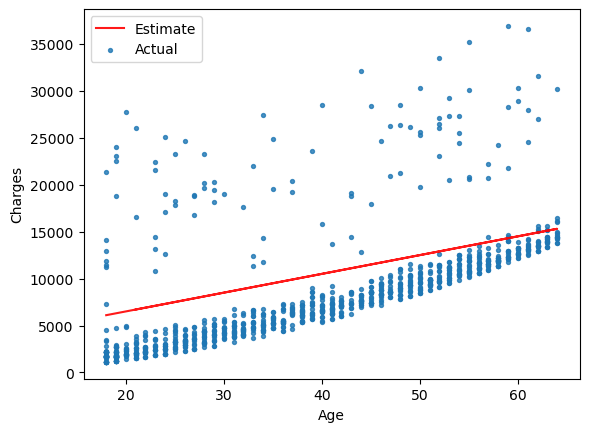

In [155]:
try_parameters(non_smoker_df, w1, b1)

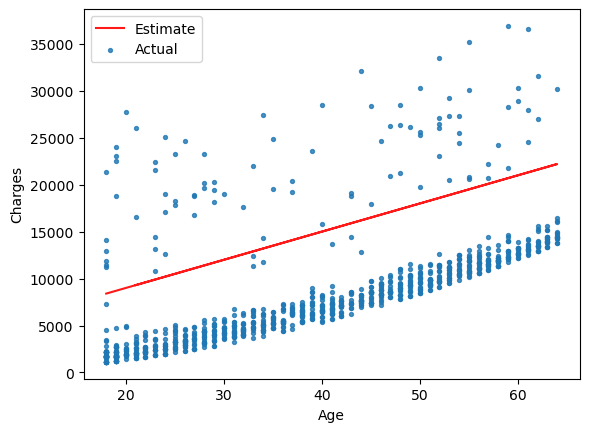

In [156]:
try_parameters(non_smoker_df, w2, b2)

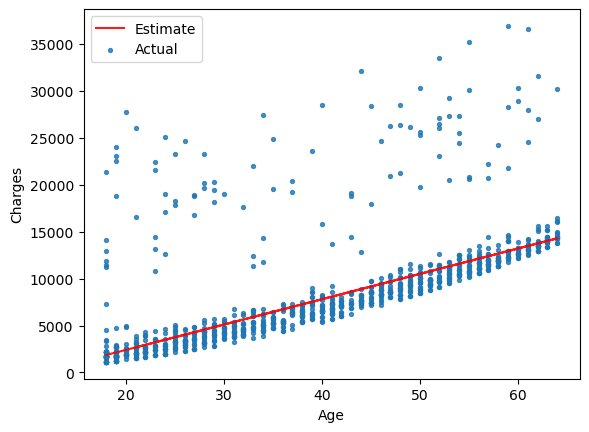

In [157]:
try_parameters(non_smoker_df, w3, b3)

***Пробуючи різні варіації параметрів `w` та `b`, бачимо, що для того, щоб змінити кут нахилу лінії, потрібно регулювати значення `w`, для зміни висоти лінії - змінюємо значення `b`. Але звісно для точних значень потрібно використати метод найменших квадратів.***

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [158]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = non_smoker_df['charges']
predicted_1 = estimate_charges(non_smoker_df.age, w1, b1)
predicted_2 = estimate_charges(non_smoker_df.age, w2, b2)
predicted_3 = estimate_charges(non_smoker_df.age, w3, b3)

In [159]:
# Обчислимо для наших пар значень w та b
print(f'Для w1={w1}, b1={b1}: RMSE={rmse(targets, predicted_1)}')
print(f'Для w2={w2}, b2={b2}: RMSE={rmse(targets, predicted_2)}')
print(f'Для w3={w3}, b3={b3}: RMSE={rmse(targets, predicted_3)}')

Для w1=200, b1=2500: RMSE=5139.024562777476
Для w2=300, b2=3000: RMSE=7916.623165325289
Для w3=270, b3=-3000: RMSE=4730.837444535129


***Отже, бачимо, що третя пара має найменший показник RMSE, тобто з цих трьох пар остання є найкращою. Щоб вручну пробувати знаходити найкращі w та b, потрібно зрозуміти, чи нам наявну лінію потрібно опустити чи підняти (змінюючи b), та пробувати змінювати кут нахилу (змінюючи w) і пробувати нашу лінію підігнати під тенденцію, яка формує лінійний звʼязок. І порівнювати значення RMSE, щоб розуміти втрату, яку треба зменшувати.***

***Але для точних результатів потрібно використовувати Метод найменших квадратів або Градієнтний спуск.***